In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("output_data.csv")

In [28]:
df.head()

,SamplingMethod,DatasetType,NrOfPoints,Seed,SampleSize,TotalTime,RoundTimes,CoresetSize,AvgQuality,NormQuality
0,Grid,Noisy circle,1500,100,0.0,42.76,"[8.08, 6.81, 6.7, 6.72]",44,1.279677,1.262436
1,Ball,Noisy circle,1500,100,1.5,27.68,"[7.16, 6.82, 6.69, 6.84]",11,1.464249,1.047523
2,Ball,Noisy circle,1500,100,15.0,27.10,"[6.83, 6.63, 6.72, 6.75]",11,1.526560,1.378702
3,Ball,Noisy circle,1500,100,150.0,26.77,"[6.61, 6.66, 6.67, 6.64]",11,1.765578,1.779652
4,Grid,Noisy moon,1500,100,0.0,27.68,"[6.76, 6.7, 7.34, 6.73]",25,1.589477,0.156903


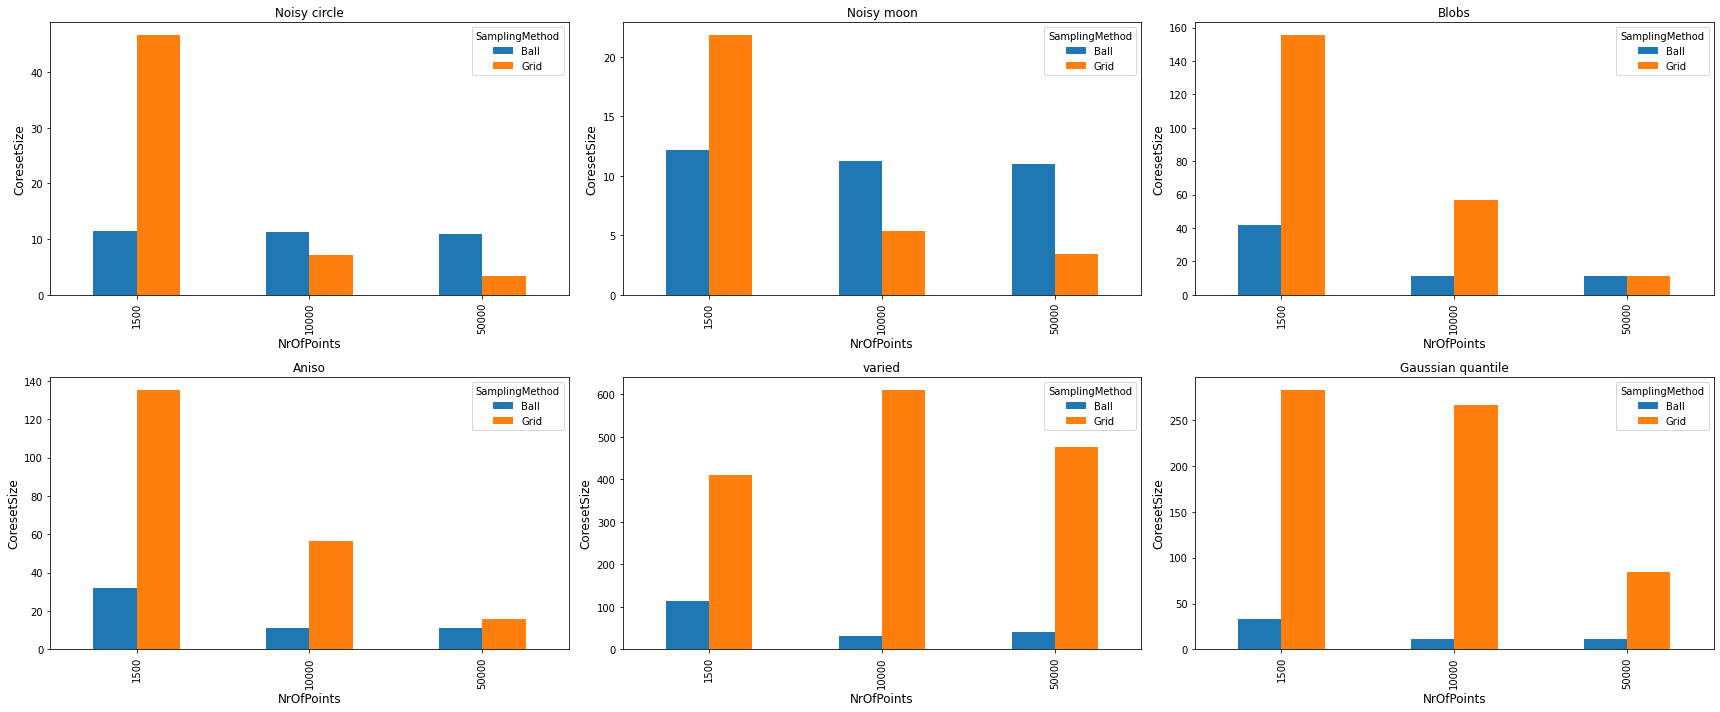

In [32]:
# coreset size per dataset for ball vs. grid
dataset_types = df["DatasetType"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.ravel()

for i in range(len(dataset_types)):
    plot = pd.pivot_table(df[df["DatasetType"]==dataset_types[i]], values = 'CoresetSize', index = 'NrOfPoints', columns = 'SamplingMethod',
                   aggfunc = lambda x: np.mean(x)).plot.bar(ax=axes[i])
    
    plot.set_ylabel("CoresetSize", size = 12)
    plot.set_xlabel("NrOfPoints", size = 12);
    plot.set_title(dataset_types[i])
fig.tight_layout()


In [4]:
print(df[df['DatasetType'] == "Noisy circle"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Noisy circle"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              1.716564     1.334336
Grid              1.601433     1.080961


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5           1.586498     1.149350
                          15.0          1.633636     1.440767
                          150.0         1.734050     1.344409
           Grid           0.0           1.243005     1.073745
10000      Ball           10.0          1.794205     1.405440
                          100.0         1.632316     1.289719
                          1000.0        1.815364     1.389768
           Grid           0.0           1.628101     1.200892
50000      Ball           50.0          1.746140     1.333729
                          500.0         1.807669     1.334611
                          5000.0        1.699200     1.321229
           Grid           0.0           1.933193     0.968246

In [5]:
print(df[df['DatasetType'] == "Noisy moon"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Noisy moon"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              2.142118     1.541863
Grid              2.055894     1.717292


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5           2.112544     1.306049
                          15.0          2.068366     1.700808
                          150.0         1.994044     1.972176
           Grid           0.0           1.667423     1.372392
10000      Ball           10.0          2.141624     1.338439
                          100.0         2.254601     1.883173
                          1000.0        2.192244     1.379366
           Grid           0.0           2.261113     1.995388
50000      Ball           50.0          2.178310     1.801274
                          500.0         2.119632     0.661200
                          5000.0        2.217700     1.834277
           Grid           0.0           2.239148     1.784097

In [6]:
print(df[df['DatasetType'] == "Blobs"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Blobs"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             33.894622    18.311101
Grid             33.129817    14.568258


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          33.308403    13.223529
                          15.0         33.457310    21.555586
                          150.0        33.458490    12.534350
           Grid           0.0          32.292829    19.686845
10000      Ball           10.0         33.555561    15.019032
                          100.0        35.310101    21.321661
                          1000.0       33.277842    20.812951
           Grid           0.0          32.438574     7.495833
50000      Ball           50.0         32.957963    19.839601
                          500.0        35.392873    24.705236
                          5000.0       34.333055    15.787966
           Grid           0.0          34.658047    16.522097

In [7]:
print(df[df['DatasetType'] == "Aniso"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Aniso"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             12.139845     7.650541
Grid              8.442140     5.664851


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          10.640010     5.755356
                          15.0         11.728381     6.768702
                          150.0        11.443389     9.148092
           Grid           0.0           8.142474     5.830960
10000      Ball           10.0         12.384839     7.180131
                          100.0        12.121480     7.394023
                          1000.0       11.883797     8.008154
           Grid           0.0           8.294162     6.917520
50000      Ball           50.0         12.928957     8.660374
                          500.0        13.461214     9.938107
                          5000.0       12.666539     6.001927
           Grid           0.0           8.889785     4.246072

In [8]:
print(df[df['DatasetType'] == "varied"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "varied"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball             20.993208    13.171137
Grid             17.128305    11.814898


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5          18.386863    12.412828
                          15.0         19.291892     7.638457
                          150.0        19.058587    13.014305
           Grid           0.0          17.013827    11.413841
10000      Ball           10.0         22.515983    15.327251
                          100.0        23.116994    14.566567
                          1000.0       21.411136    13.424251
           Grid           0.0          17.155415     9.586498
50000      Ball           50.0         21.708294    14.093115
                          500.0        21.335438    14.759195
                          5000.0       22.113686    13.304261
           Grid           0.0          17.215672    14.444355

In [9]:
print(df[df['DatasetType'] == "Gaussian quantile"].groupby(["SamplingMethod"])[["AvgQuality", "NormQuality"]].mean())
df[df['DatasetType'] == "Gaussian quantile"].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"])[["AvgQuality", "NormQuality"]].mean()

                AvgQuality  NormQuality
SamplingMethod                         
Ball              7.726468     4.683327
Grid              4.120757     2.596527


AvgQuality  NormQuality
NrOfPoints SamplingMethod SampleSize                         
1500       Ball           1.5           6.891074     4.170346
                          15.0          6.916352     4.438878
                          150.0         6.875668     4.094602
           Grid           0.0           3.874219     2.494769
10000      Ball           10.0          9.106935     5.644359
                          100.0         7.933356     5.335854
                          1000.0        7.658380     4.790437
           Grid           0.0           4.064245     2.387573
50000      Ball           50.0          8.365381     5.035809
                          500.0         7.861176     4.316751
                          5000.0        7.929894     4.322903
           Grid           0.0           4.423808     2.907238

## Timing

In [10]:
df.groupby(["SamplingMethod", "NrOfPoints", "SampleSize"]).mean()

Seed  TotalTime  CoresetSize  \
SamplingMethod NrOfPoints SampleSize                                  
Ball           1500       1.5         102.8  43.085000    39.100000   
                          15.0        102.8  39.041667    40.166667   
                          150.0       102.8  40.255333    43.266667   
               10000      10.0        102.8  38.583667    14.433333   
                          100.0       102.8  39.443000    15.400000   
                          1000.0      102.8  39.927000    13.700000   
               50000      50.0        102.8  39.151000    15.700000   
                          500.0       102.8  40.097000    15.733333   
                          5000.0      102.8  39.409333    16.233333   
Grid           1500       0.0         102.8  41.774333   175.366667   
               10000      0.0         102.8  39.512667   166.966667   
               50000      0.0         102.8  39.358333    99.066667   

                                      AvgQuality  NormQuality  
SamplingMethod NrOfPoints SampleSize                           
Ball           1500       1.5          12.154232     6.336243  
                          15.0         12.515990     7.257200  
                          150.0        12.427371     7.017989  
               10000      10.0         13.583191     7.652442  
                          100.0        13.728141     8.631833  
                          1000.0       13.039794     8.300821  
               50000      50.0         13.314174     8.460650  
                          500.0        13.663000     9.285850  
                          5000.0       13.493346     7.095427  
Grid           1500       0.0          10.705630     6.978759  
               10000      0.0          10.973602     4.930617  
               50000      0.0          11.559942     6.812018

In [11]:
runtime = df[["SamplingMethod", "NrOfPoints", "SampleSize", "TotalTime"]].groupby(["NrOfPoints", "SamplingMethod", "SampleSize"]).mean()
runtime

TotalTime
NrOfPoints SamplingMethod SampleSize           
1500       Ball           1.5         43.085000
                          15.0        39.041667
                          150.0       40.255333
           Grid           0.0         41.774333
10000      Ball           10.0        38.583667
                          100.0       39.443000
                          1000.0      39.927000
           Grid           0.0         39.512667
50000      Ball           50.0        39.151000
                          500.0       40.097000
                          5000.0      39.409333
           Grid           0.0         39.358333

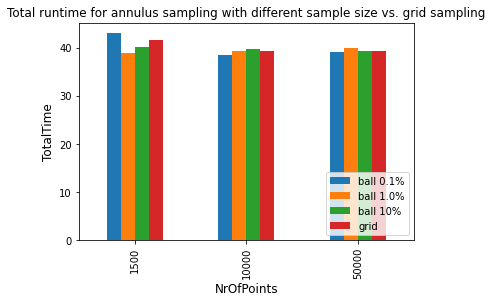

In [24]:
ball_01 = [43.085000, 38.583667, 39.151000]
ball_1 = [39.041667, 39.443000, 40.097000]
ball_10 = [40.255333, 39.927000, 39.409333]
grid = [41.774333, 39.512667, 39.358333]
index = ['1500', '10000', '50000']
df = pd.DataFrame({'ball 0.1%': ball_01,
                   'ball 1.0%': ball_1,
                   'ball 10%': ball_10,
                   'grid': grid}, index=index)
ax = df.plot.bar()
ax.set_ylabel("TotalTime", size = 12)
ax.set_xlabel("NrOfPoints", size = 12);
ax.set_title("Total runtime for annulus sampling with different sample size vs. grid sampling")
ax.legend(loc='lower right')